Import libraries

In [261]:
import tensorflow as tf
import numpy as np
import os
import distutils
import matplotlib.pyplot as plt

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import Model
from keras.optimizers import Adam, SGD, RMSprop, Nadam

from sklearn.metrics import confusion_matrix

from tensorflow.keras.layers import *
from tensorflow.keras.activations import *


Download MNIST/MNIST fashion data


In [269]:
#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = np.float32(np.expand_dims(x_train, -1)/255)
x_test = np.float32(np.expand_dims(x_test, -1)/255)

# Convert y to one-hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#get input shape
ip_shape = x_train[0].shape
print(ip_shape)

(28, 28, 1)


Reshape for use with dense network


In [257]:
x_train = x_train.reshape((-1,784))
x_test = x_test.reshape((-1,784))

Check data shape

In [270]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 10) (10000, 10)


Download CIFAR10 data

In [236]:
import tensorflow as tf
import numpy as np
import os
import distutils

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert y to one-hot
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# get input shape
ip_shape = x_train[0].shape
print(ip_shape)


(32, 32, 3)


Make Dataset small

In [264]:
x_train = x_train[:1000]
y_train = y_train[:1000]
print(x_train.shape)

(1000, 28, 28, 1)


Data Augmentation

In [265]:
x_train2 = np.zeros((x_train.shape[0]*2,x_train.shape[1],x_train.shape[2],x_train.shape[3]),dtype=np.float32)
x_train2[:x_train.shape[0]] = x_train
x_train2[x_train.shape[0]:] = x_train[:,:,::-1]
x_train = x_train2
y_train = np.vstack((y_train,y_train))
print(x_train.shape,y_train.shape)

(2000, 28, 28, 1) (2000, 10)


In [ ]:
x_train2 = np.zeros((x_train.shape[0]*2,x_train.shape[1],x_train.shape[2],x_train.shape[3]),dtype=np.float32)
x_train2[:x_train.shape[0]] = x_train
x_train2[x_train.shape[0]:] = x_train[:,:,::-1]
x_train = x_train2
y_train = np.vstack((y_train,y_train))
print(x_train.shape,y_train.shape)

(100000, 32, 32, 3) (100000, 10)


In [266]:
def dense_model(input_shape=ip_shape):
  model = tf.keras.models.Sequential()
  model.add(Dense(5, input_shape=input_shape, activation='relu'))
  model.add(Flatten())
  model.add(Dense(4, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

In [267]:
model = dense_model()
model.summary()
opt = RMSprop(lr=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])


Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 28, 28, 5)         10        
_________________________________________________________________
flatten_32 (Flatten)         (None, 3920)              0         
_________________________________________________________________
dense_116 (Dense)            (None, 4)                 15684     
_________________________________________________________________
dense_117 (Dense)            (None, 10)                50        
Total params: 15,744
Trainable params: 15,744
Non-trainable params: 0
_________________________________________________________________


In [271]:
def cnn_model(input_shape=ip_shape):
  model = tf.keras.models.Sequential()
  model.add(Conv2D(3, (2, 2), input_shape=input_shape))
  model.add(Conv2D(3, (2, 2), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(3, (2, 2)))
  model.add(Conv2D(3, (2, 2), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  model.add(Flatten())
  model.add(Dense(5, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

In [272]:
model = cnn_model()
model.summary()
opt = RMSprop(lr=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])


Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_89 (Conv2D)           (None, 27, 27, 3)         15        
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 26, 26, 3)         39        
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 13, 13, 3)         0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 12, 12, 3)         39        
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 11, 11, 3)         39        
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 6, 6, 3)           0         
_________________________________________________________________
flatten_33 (Flatten)         (None, 108)             

In [273]:
history = model.fit(
    x_train, y_train,
    epochs =  20, 
    validation_data=(x_test, y_test),
    batch_size=128, 
    verbose = 1,
)

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 1.8309 - accuracy: 0.3074 - val_loss: 0.9997 - val_accuracy: 0.6583
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.8983 - accuracy: 0.6898 - val_loss: 0.7831 - val_accuracy: 0.7130
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.7456 - accuracy: 0.7314 - val_loss: 0.7132 - val_accuracy: 0.7362
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.6893 - accuracy: 0.7463 - val_loss: 0.6991 - val_accuracy: 0.7423
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.6656 - accuracy: 0.7556 - val_loss: 0.6608 - val_accuracy: 0.7550
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.6364 - accuracy: 0.7637 - val_loss: 0.6462 - val_accuracy: 0.7550
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.6253 - accuracy: 0.7643 - val_loss: 0.6428 - val_accuracy: 0.7659
Epoch 

Plot results


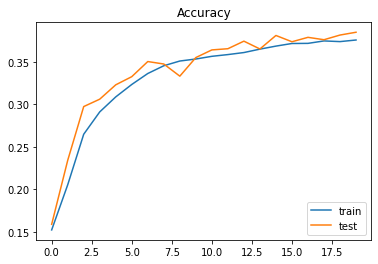

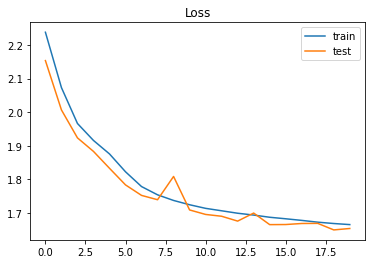

In [185]:
fig, ax = plt.subplots()
ax.plot(accuracy,label = 'train')
ax.plot(val_accuracy,label = 'test')
ax.set_title('Accuracy')
ax.legend(loc='lower right')
fig, ax = plt.subplots()
ax.plot(loss,label = 'train')
ax.plot(val_loss,label = 'test')
ax.set_title('Loss')
ax.legend(loc='upper right')